# 2D Regularization Demo: L1, L2, and ElasticNet

This notebook demonstrates regularization methods using simple 2D data points and visualizes how different penalty functions work.

## Learning Objectives:
- See how regularization affects 2D regression lines
- Understand penalty functions visually
- Compare L1, L2, and ElasticNet on real data
- Visualize the bias-variance trade-off


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


Dataset created:
- Samples: 50
- True relationship: y = 2.0x + 1.0
- Added 3 outliers


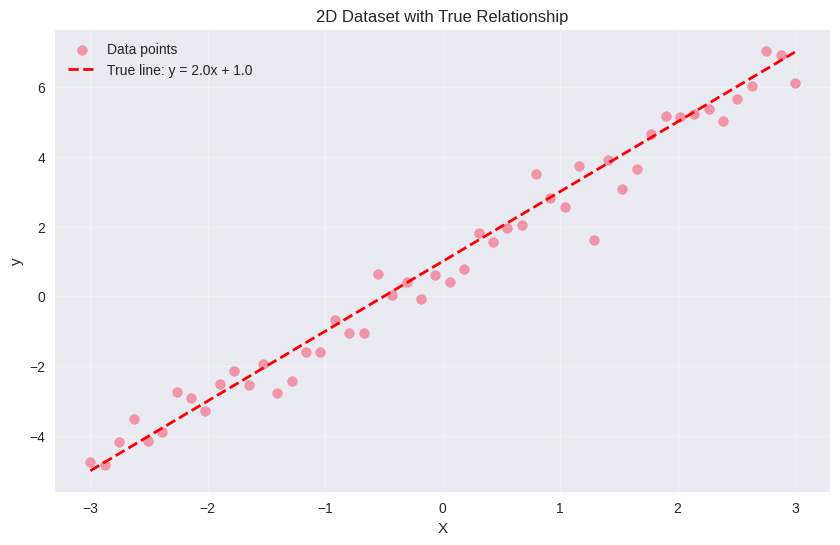

In [2]:
# Generate 2D dataset with some noise and outliers
np.random.seed(42)

# Create simple 2D data
n_samples = 50
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)

# True relationship: y = 2x + 1 + noise
true_slope = 2.0
true_intercept = 1.0
y_true = true_slope * X.flatten() + true_intercept

# Add noise
noise = np.random.normal(0, 0.5, n_samples)
y = y_true + noise

# Add some outliers to make it more interesting
outlier_indices = [10, 25, 35]
y[outlier_indices] += np.random.normal(0, 2, len(outlier_indices))

print(f"Dataset created:")
print(f"- Samples: {n_samples}")
print(f"- True relationship: y = {true_slope}x + {true_intercept}")
print(f"- Added {len(outlier_indices)} outliers")

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, s=50, label='Data points')
plt.plot(X, y_true, 'r--', linewidth=2, label=f'True line: y = {true_slope}x + {true_intercept}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('2D Dataset with True Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


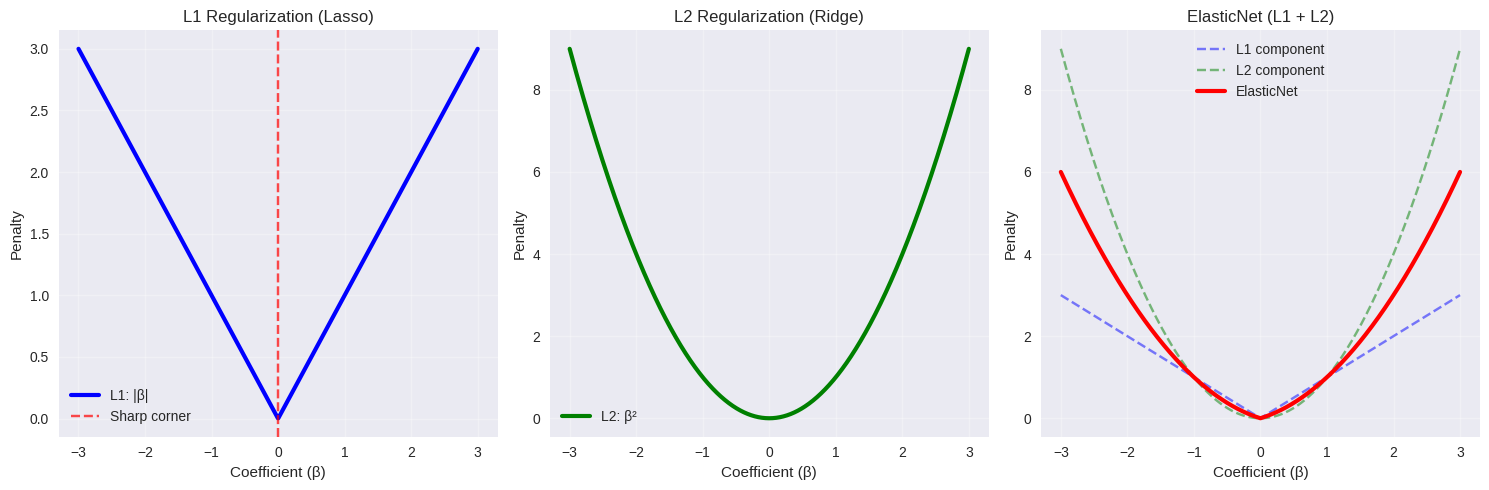

Key insights:
• L1 has a sharp corner at 0 → can force coefficients to exactly 0
• L2 is smooth everywhere → shrinks coefficients but never to 0
• ElasticNet combines both behaviors


In [3]:
# Visualize penalty functions
def plot_penalty_functions():
    """
    Visualize L1, L2, and ElasticNet penalty functions
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Create coefficient values
    beta = np.linspace(-3, 3, 1000)
    
    # L1 penalty (Lasso)
    ax1 = axes[0]
    l1_penalty = np.abs(beta)
    ax1.plot(beta, l1_penalty, 'b-', linewidth=3, label='L1: |β|')
    ax1.set_xlabel('Coefficient (β)')
    ax1.set_ylabel('Penalty')
    ax1.set_title('L1 Regularization (Lasso)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Highlight the sharp corner at 0
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Sharp corner')
    ax1.legend()
    
    # L2 penalty (Ridge)
    ax2 = axes[1]
    l2_penalty = beta**2
    ax2.plot(beta, l2_penalty, 'g-', linewidth=3, label='L2: β²')
    ax2.set_xlabel('Coefficient (β)')
    ax2.set_ylabel('Penalty')
    ax2.set_title('L2 Regularization (Ridge)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # ElasticNet penalty
    ax3 = axes[2]
    l1_ratio = 0.5
    elastic_penalty = l1_ratio * np.abs(beta) + (1 - l1_ratio) * beta**2
    ax3.plot(beta, l1_penalty, 'b--', alpha=0.5, label='L1 component')
    ax3.plot(beta, l2_penalty, 'g--', alpha=0.5, label='L2 component')
    ax3.plot(beta, elastic_penalty, 'r-', linewidth=3, label='ElasticNet')
    ax3.set_xlabel('Coefficient (β)')
    ax3.set_ylabel('Penalty')
    ax3.set_title('ElasticNet (L1 + L2)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    plt.tight_layout()
    return fig

fig = plot_penalty_functions()
plt.show()

print("Key insights:")
print("• L1 has a sharp corner at 0 → can force coefficients to exactly 0")
print("• L2 is smooth everywhere → shrinks coefficients but never to 0")
print("• ElasticNet combines both behaviors")


In [4]:
# Fit different models with various regularization strengths
alphas = [0.01, 0.1, 1.0, 10.0]

# Store results
models = {}
predictions = {}
coefficients = {}

print("Fitting models with different regularization strengths...")

for alpha in alphas:
    # L1 (Lasso)
    lasso = Lasso(alpha=alpha, max_iter=2000)
    lasso.fit(X, y)
    models[f'L1_α{alpha}'] = lasso
    predictions[f'L1_α{alpha}'] = lasso.predict(X)
    coefficients[f'L1_α{alpha}'] = [lasso.intercept_, lasso.coef_[0]]
    
    # L2 (Ridge)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    models[f'L2_α{alpha}'] = ridge
    predictions[f'L2_α{alpha}'] = ridge.predict(X)
    coefficients[f'L2_α{alpha}'] = [ridge.intercept_, ridge.coef_[0]]
    
    # ElasticNet
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=2000)
    elastic.fit(X, y)
    models[f'EN_α{alpha}'] = elastic
    predictions[f'EN_α{alpha}'] = elastic.predict(X)
    coefficients[f'EN_α{alpha}'] = [elastic.intercept_, elastic.coef_[0]]

# Also fit unregularized model
lr = LinearRegression()
lr.fit(X, y)
models['No_Reg'] = lr
predictions['No_Reg'] = lr.predict(X)
coefficients['No_Reg'] = [lr.intercept_, lr.coef_[0]]

print("✓ All models fitted successfully!")

# Print coefficients
print("\\nModel Coefficients (intercept, slope):")
print(f"True relationship: [{true_intercept}, {true_slope}]")
for name, coef in coefficients.items():
    print(f"{name:12}: [{coef[0]:6.3f}, {coef[1]:6.3f}]")


Fitting models with different regularization strengths...
✓ All models fitted successfully!
\nModel Coefficients (intercept, slope):
True relationship: [1.0, 2.0]
L1_α0.01    : [ 0.858,  1.930]
L2_α0.01    : [ 0.858,  1.933]
EN_α0.01    : [ 0.858,  1.928]
L1_α0.1     : [ 0.858,  1.901]
L2_α0.1     : [ 0.858,  1.932]
EN_α0.1     : [ 0.858,  1.887]
L1_α1.0     : [ 0.858,  1.613]
L2_α1.0     : [ 0.858,  1.921]
EN_α1.0     : [ 0.858,  1.528]
L1_α10.0    : [ 0.858,  0.000]
L2_α10.0    : [ 0.858,  1.817]
EN_α10.0    : [ 0.858,  0.127]
No_Reg      : [ 0.858,  1.933]


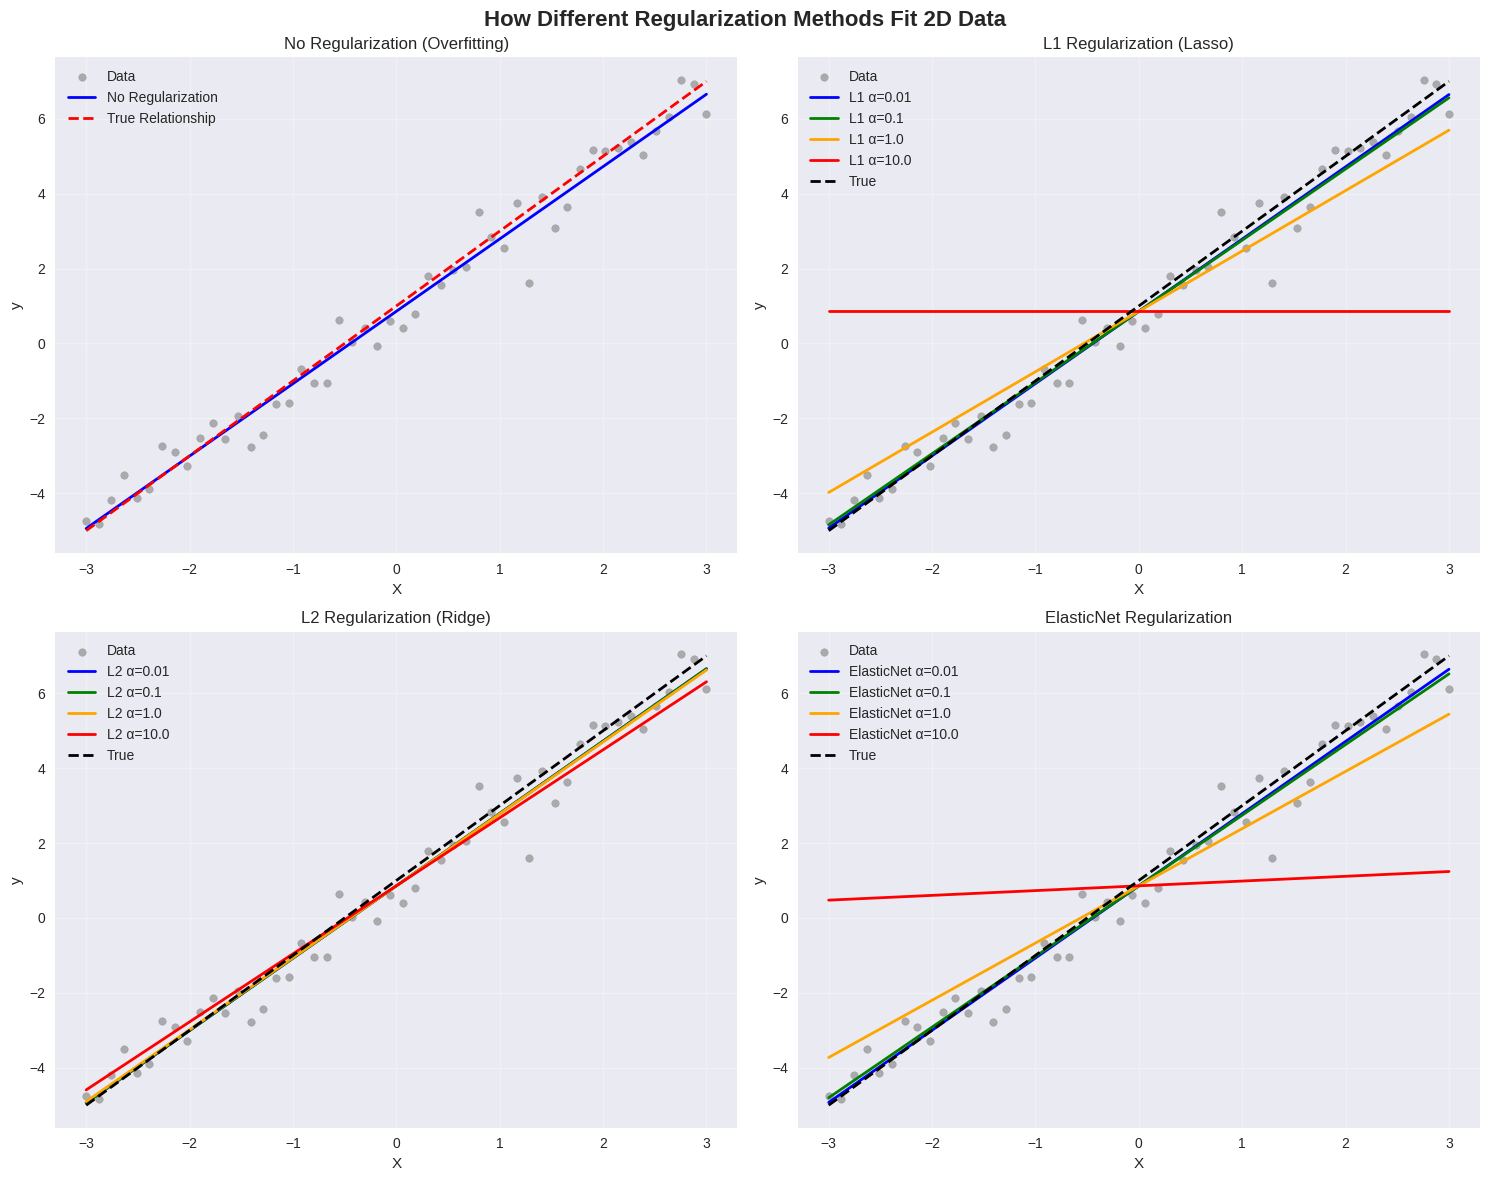

Observations:
• Higher α values create simpler models (closer to horizontal line)
• L1 can completely eliminate features (slope = 0)
• L2 shrinks coefficients smoothly
• ElasticNet combines both behaviors


In [5]:
# Visualize how different models fit the data
def plot_model_fits():
    """
    Plot how different regularization methods fit the 2D data
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('How Different Regularization Methods Fit 2D Data', fontsize=16, fontweight='bold')
    
    # Create X values for smooth plotting
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    
    # Plot 1: No regularization vs True relationship
    ax1 = axes[0, 0]
    ax1.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    ax1.plot(X_plot, models['No_Reg'].predict(X_plot), 'b-', linewidth=2, label='No Regularization')
    ax1.plot(X_plot, true_slope * X_plot.flatten() + true_intercept, 'r--', linewidth=2, label='True Relationship')
    ax1.set_title('No Regularization (Overfitting)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: L1 (Lasso) with different alphas
    ax2 = axes[0, 1]
    ax2.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    colors = ['blue', 'green', 'orange', 'red']
    for i, alpha in enumerate(alphas):
        model_name = f'L1_α{alpha}'
        ax2.plot(X_plot, models[model_name].predict(X_plot), 
                color=colors[i], linewidth=2, label=f'L1 α={alpha}')
    ax2.plot(X_plot, true_slope * X_plot.flatten() + true_intercept, 'k--', linewidth=2, label='True')
    ax2.set_title('L1 Regularization (Lasso)')
    ax2.set_xlabel('X')
    ax2.set_ylabel('y')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: L2 (Ridge) with different alphas
    ax3 = axes[1, 0]
    ax3.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    for i, alpha in enumerate(alphas):
        model_name = f'L2_α{alpha}'
        ax3.plot(X_plot, models[model_name].predict(X_plot), 
                color=colors[i], linewidth=2, label=f'L2 α={alpha}')
    ax3.plot(X_plot, true_slope * X_plot.flatten() + true_intercept, 'k--', linewidth=2, label='True')
    ax3.set_title('L2 Regularization (Ridge)')
    ax3.set_xlabel('X')
    ax3.set_ylabel('y')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: ElasticNet with different alphas
    ax4 = axes[1, 1]
    ax4.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    for i, alpha in enumerate(alphas):
        model_name = f'EN_α{alpha}'
        ax4.plot(X_plot, models[model_name].predict(X_plot), 
                color=colors[i], linewidth=2, label=f'ElasticNet α={alpha}')
    ax4.plot(X_plot, true_slope * X_plot.flatten() + true_intercept, 'k--', linewidth=2, label='True')
    ax4.set_title('ElasticNet Regularization')
    ax4.set_xlabel('X')
    ax4.set_ylabel('y')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

fig = plot_model_fits()
plt.show()

print("Observations:")
print("• Higher α values create simpler models (closer to horizontal line)")
print("• L1 can completely eliminate features (slope = 0)")
print("• L2 shrinks coefficients smoothly")
print("• ElasticNet combines both behaviors")


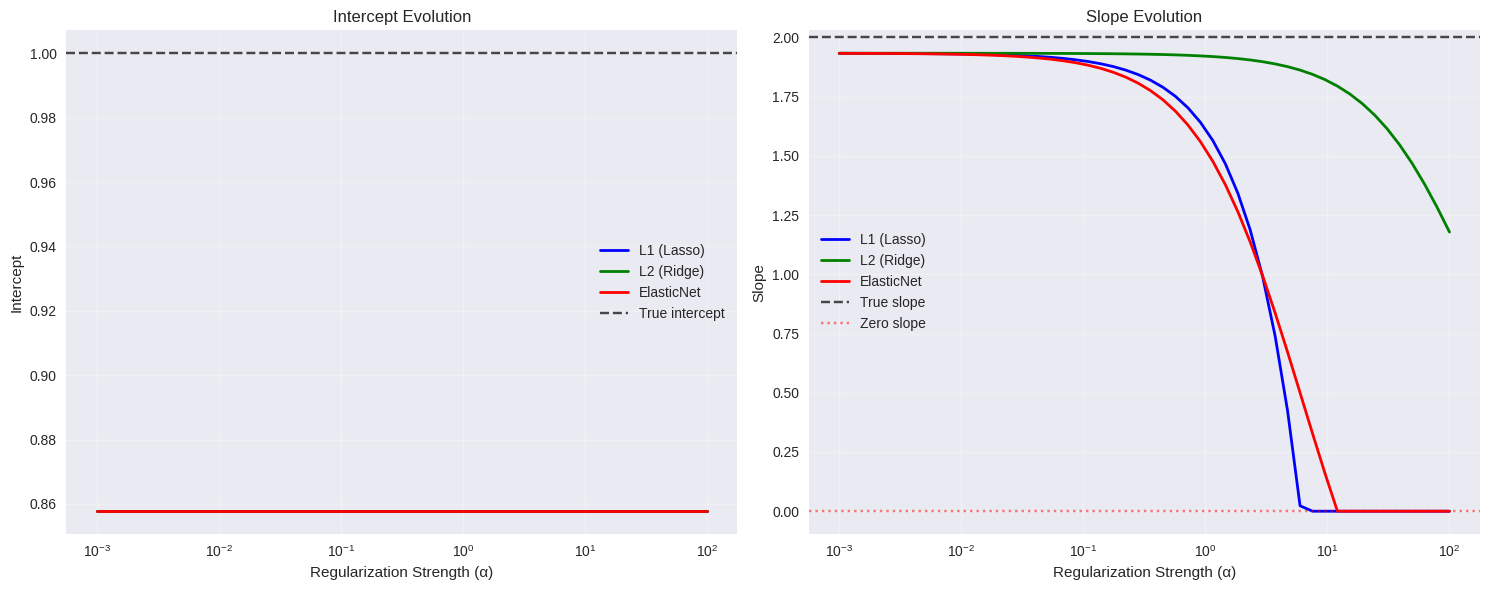

Key observations:
• L1 can force slope to exactly 0 (feature selection)
• L2 shrinks slope smoothly but never to 0
• ElasticNet shows intermediate behavior
• All methods shrink coefficients toward 0 as α increases


In [6]:
# Show how coefficients change with regularization strength
def plot_coefficient_evolution():
    """
    Plot how coefficients evolve with regularization strength
    """
    # Create more alpha values for smooth curves
    alphas_dense = np.logspace(-3, 2, 50)
    
    # Store coefficient paths
    l1_intercepts = []
    l1_slopes = []
    l2_intercepts = []
    l2_slopes = []
    en_intercepts = []
    en_slopes = []
    
    for alpha in alphas_dense:
        # L1
        lasso = Lasso(alpha=alpha, max_iter=2000)
        lasso.fit(X, y)
        l1_intercepts.append(lasso.intercept_)
        l1_slopes.append(lasso.coef_[0])
        
        # L2
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        l2_intercepts.append(ridge.intercept_)
        l2_slopes.append(ridge.coef_[0])
        
        # ElasticNet
        elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=2000)
        elastic.fit(X, y)
        en_intercepts.append(elastic.intercept_)
        en_slopes.append(elastic.coef_[0])
    
    # Plot coefficient evolution
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Intercept evolution
    ax1 = axes[0]
    ax1.plot(alphas_dense, l1_intercepts, 'b-', linewidth=2, label='L1 (Lasso)')
    ax1.plot(alphas_dense, l2_intercepts, 'g-', linewidth=2, label='L2 (Ridge)')
    ax1.plot(alphas_dense, en_intercepts, 'r-', linewidth=2, label='ElasticNet')
    ax1.axhline(y=true_intercept, color='black', linestyle='--', alpha=0.7, label='True intercept')
    ax1.set_xlabel('Regularization Strength (α)')
    ax1.set_ylabel('Intercept')
    ax1.set_title('Intercept Evolution')
    ax1.set_xscale('log')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Slope evolution
    ax2 = axes[1]
    ax2.plot(alphas_dense, l1_slopes, 'b-', linewidth=2, label='L1 (Lasso)')
    ax2.plot(alphas_dense, l2_slopes, 'g-', linewidth=2, label='L2 (Ridge)')
    ax2.plot(alphas_dense, en_slopes, 'r-', linewidth=2, label='ElasticNet')
    ax2.axhline(y=true_slope, color='black', linestyle='--', alpha=0.7, label='True slope')
    ax2.axhline(y=0, color='red', linestyle=':', alpha=0.5, label='Zero slope')
    ax2.set_xlabel('Regularization Strength (α)')
    ax2.set_ylabel('Slope')
    ax2.set_title('Slope Evolution')
    ax2.set_xscale('log')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

fig = plot_coefficient_evolution()
plt.show()

print("Key observations:")
print("• L1 can force slope to exactly 0 (feature selection)")
print("• L2 shrinks slope smoothly but never to 0")
print("• ElasticNet shows intermediate behavior")
print("• All methods shrink coefficients toward 0 as α increases")


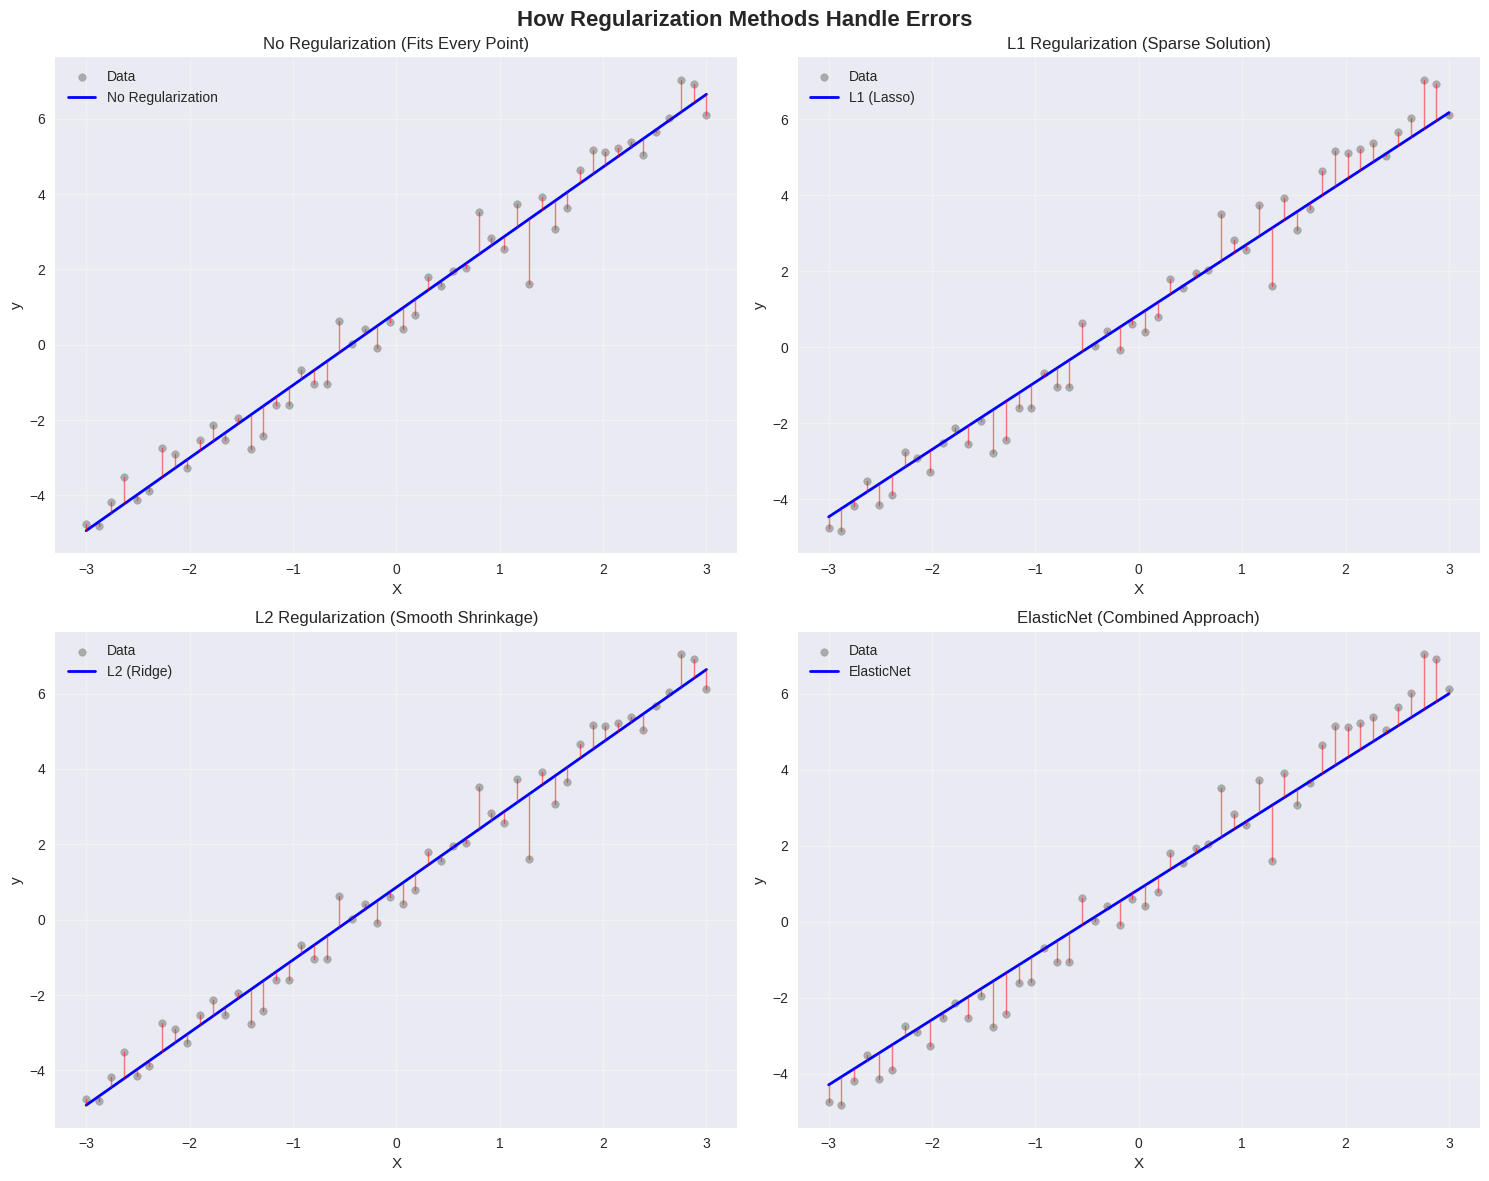

NameError: name 'y_lr' is not defined

In [7]:
# Visualize how different methods handle errors
def plot_error_handling():
    """
    Show how different regularization methods handle prediction errors
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('How Regularization Methods Handle Errors', fontsize=16, fontweight='bold')
    
    # Choose a moderate alpha for demonstration
    alpha_demo = 0.5
    
    # Fit models
    lasso = Lasso(alpha=alpha_demo, max_iter=2000)
    ridge = Ridge(alpha=alpha_demo)
    elastic = ElasticNet(alpha=alpha_demo, l1_ratio=0.5, max_iter=2000)
    lr = LinearRegression()
    
    lasso.fit(X, y)
    ridge.fit(X, y)
    elastic.fit(X, y)
    lr.fit(X, y)
    
    # Get predictions
    y_lasso = lasso.predict(X)
    y_ridge = ridge.predict(X)
    y_elastic = elastic.predict(X)
    y_lr = lr.predict(X)
    
    # Plot 1: No Regularization
    ax1 = axes[0, 0]
    ax1.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    ax1.plot(X, y_lr, 'b-', linewidth=2, label='No Regularization')
    
    # Draw error lines
    for i in range(len(X)):
        ax1.plot([X[i], X[i]], [y[i], y_lr[i]], 'r-', alpha=0.5, linewidth=1)
    
    ax1.set_title('No Regularization (Fits Every Point)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: L1 Regularization
    ax2 = axes[0, 1]
    ax2.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    ax2.plot(X, y_lasso, 'b-', linewidth=2, label='L1 (Lasso)')
    
    # Draw error lines
    for i in range(len(X)):
        ax2.plot([X[i], X[i]], [y[i], y_lasso[i]], 'r-', alpha=0.5, linewidth=1)
    
    ax2.set_title('L1 Regularization (Sparse Solution)')
    ax2.set_xlabel('X')
    ax2.set_ylabel('y')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: L2 Regularization
    ax3 = axes[1, 0]
    ax3.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    ax3.plot(X, y_ridge, 'b-', linewidth=2, label='L2 (Ridge)')
    
    # Draw error lines
    for i in range(len(X)):
        ax3.plot([X[i], X[i]], [y[i], y_ridge[i]], 'r-', alpha=0.5, linewidth=1)
    
    ax3.set_title('L2 Regularization (Smooth Shrinkage)')
    ax3.set_xlabel('X')
    ax3.set_ylabel('y')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: ElasticNet
    ax4 = axes[1, 1]
    ax4.scatter(X, y, alpha=0.6, s=30, color='gray', label='Data')
    ax4.plot(X, y_elastic, 'b-', linewidth=2, label='ElasticNet')
    
    # Draw error lines
    for i in range(len(X)):
        ax4.plot([X[i], X[i]], [y[i], y_elastic[i]], 'r-', alpha=0.5, linewidth=1)
    
    ax4.set_title('ElasticNet (Combined Approach)')
    ax4.set_xlabel('X')
    ax4.set_ylabel('y')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

fig = plot_error_handling()
plt.show()

# Calculate and display errors
mse_lr = mean_squared_error(y, y_lr)
mse_lasso = mean_squared_error(y, y_lasso)
mse_ridge = mean_squared_error(y, y_ridge)
mse_elastic = mean_squared_error(y, y_elastic)

print(f"Mean Squared Errors (α = {alpha_demo}):")
print(f"No Regularization: {mse_lr:.4f}")
print(f"L1 (Lasso):        {mse_lasso:.4f}")
print(f"L2 (Ridge):        {mse_ridge:.4f}")
print(f"ElasticNet:        {mse_elastic:.4f}")
print("\\nNote: Higher training error but better generalization!")


In [ ]:
# Create animated demonstration
def create_animated_demo():
    """
    Create animated visualization showing regularization effects
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Animated Regularization Demo', fontsize=16, fontweight='bold')
    
    # Create alpha range for animation
    alphas_anim = np.logspace(-2, 1, 30)
    
    # Initialize plots
    ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
    
    # Plot data points
    for ax in [ax1, ax2, ax3, ax4]:
        ax.scatter(X, y, alpha=0.6, s=30, color='gray', zorder=1)
        ax.set_xlim(-3.5, 3.5)
        ax.set_ylim(-2, 8)
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('X')
        ax.set_ylabel('y')
    
    # Initialize lines
    line1, = ax1.plot([], [], 'b-', linewidth=2, label='No Regularization')
    line2, = ax2.plot([], [], 'b-', linewidth=2, label='L1 (Lasso)')
    line3, = ax3.plot([], [], 'g-', linewidth=2, label='L2 (Ridge)')
    line4, = ax4.plot([], [], 'r-', linewidth=2, label='ElasticNet')
    
    # Add true line
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_true_plot = true_slope * X_plot.flatten() + true_intercept
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.plot(X_plot, y_true_plot, 'k--', alpha=0.7, label='True', zorder=0)
        ax.legend()
    
    # Set titles
    ax1.set_title('No Regularization')
    ax2.set_title('L1 Regularization (Lasso)')
    ax3.set_title('L2 Regularization (Ridge)')
    ax4.set_title('ElasticNet')
    
    # Add text annotations
    text1 = ax1.text(0.02, 0.98, '', transform=ax1.transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    text2 = ax2.text(0.02, 0.98, '', transform=ax2.transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    text3 = ax3.text(0.02, 0.98, '', transform=ax3.transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    text4 = ax4.text(0.02, 0.98, '', transform=ax4.transAxes, 
                    verticalalignment='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    def animate(frame):
        alpha = alphas_anim[frame]
        
        # No regularization (constant)
        lr = LinearRegression()
        lr.fit(X, y)
        y_pred_lr = lr.predict(X_plot)
        line1.set_data(X_plot.flatten(), y_pred_lr)
        text1.set_text(f'α = 0\\nSlope: {lr.coef_[0]:.3f}')
        
        # L1
        lasso = Lasso(alpha=alpha, max_iter=2000)
        lasso.fit(X, y)
        y_pred_lasso = lasso.predict(X_plot)
        line2.set_data(X_plot.flatten(), y_pred_lasso)
        text2.set_text(f'α = {alpha:.3f}\\nSlope: {lasso.coef_[0]:.3f}')
        
        # L2
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        y_pred_ridge = ridge.predict(X_plot)
        line3.set_data(X_plot.flatten(), y_pred_ridge)
        text3.set_text(f'α = {alpha:.3f}\\nSlope: {ridge.coef_[0]:.3f}')
        
        # ElasticNet
        elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=2000)
        elastic.fit(X, y)
        y_pred_elastic = elastic.predict(X_plot)
        line4.set_data(X_plot.flatten(), y_pred_elastic)
        text4.set_text(f'α = {alpha:.3f}\\nSlope: {elastic.coef_[0]:.3f}')
        
        return line1, line2, line3, line4, text1, text2, text3, text4
    
    anim = animation.FuncAnimation(fig, animate, frames=len(alphas_anim), 
                                 interval=200, blit=False, repeat=True)
    
    return fig, anim

print("Creating animated demonstration...")
fig, anim = create_animated_demo()

# Display animation
HTML(anim.to_jshtml())

print("Animation created! Watch how:")
print("• L1 can force slope to exactly 0")
print("• L2 shrinks slope smoothly")
print("• ElasticNet shows intermediate behavior")
print("• All methods become more conservative as α increases")


In [ ]:
# Save animation as video
print("Saving animation as video...")

try:
    anim.save('regularization_2d_demo.mp4', writer='ffmpeg', fps=5, 
              extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
    print("✓ Video saved as 'regularization_2d_demo.mp4'")
except Exception as e:
    print(f"Could not save as MP4: {e}")
    print("Trying to save as GIF...")
    
    try:
        anim.save('regularization_2d_demo.gif', writer='pillow', fps=3)
        print("✓ Animation saved as 'regularization_2d_demo.gif'")
    except Exception as e2:
        print(f"Could not save as GIF: {e2}")
        print("Please install ffmpeg or pillow for video export")

print("\\nVideo generation complete!")


## Summary: 2D Regularization Demo

This notebook demonstrated regularization methods using simple 2D data:

### Key Visualizations:
1. **Penalty Functions**: Showed how L1, L2, and ElasticNet penalize coefficients
2. **Model Fits**: Compared how different methods fit the same data
3. **Coefficient Evolution**: Tracked how coefficients change with regularization strength
4. **Error Handling**: Visualized how each method handles prediction errors
5. **Animated Demo**: Dynamic visualization of regularization effects

### Key Insights:
- **L1 (Lasso)**: Can force coefficients to exactly 0 (feature selection)
- **L2 (Ridge)**: Shrinks coefficients smoothly but never to 0
- **ElasticNet**: Combines both L1 and L2 behaviors
- **Regularization**: Trades training accuracy for better generalization

### When to Use Each:
- **L1**: When you suspect many features are irrelevant
- **L2**: When you want to keep all features but reduce overfitting
- **ElasticNet**: When you want benefits of both approaches

The animated video clearly shows how regularization strength affects model complexity and coefficient values.
